In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


'''
Path Settings
'''
CONFIGURATION_FILE_PATH = "./data/train/data_config.csv"
DATASET_PATH = "./data/train/"


'''
Figure Settings
'''
pd.set_option('display.width', 200) # for display width


'''
1. Read Configurration File (only xls)
'''
data_config = pd.read_csv(CONFIGURATION_FILE_PATH, header=0, index_col=0)
print("Configuration Dataframe dimension: ", data_config.shape)

'''
2. Read all FSR matrix data and Seat sensor data
'''
fsr_dataframe = {}
seat_dataframe = {}

for idx in data_config.index:
    fsr_filepath = DATASET_PATH+data_config.loc[idx, "fsr_matrix_1d_datafile"] # set FSR matrix data filepath
    seat_filepath = DATASET_PATH+data_config.loc[idx, "seat_datafile"] # set Seat data filepath
    print(idx, ") read data files : ", fsr_filepath, ",", seat_filepath)

    fsr_dataframe[idx] = pd.read_csv(fsr_filepath, header=0, index_col=False).iloc[:,0:162] # read FSR matrix data file
    seat_dataframe[idx] = pd.read_csv(seat_filepath, header=0, index_col=False) # read Seat data file

    # clear unnecessary columns
    del seat_dataframe[idx]['Measurement time'] # remove unnecessary column
    del fsr_dataframe[idx]['Measurement Time (sec)'] # remove unnecessary column



'''
3. Preproceess : Data Segmentation by mtime
   - @brief     FSR matrix data and Seat data should be segmented by mtime
   - @output    segmented dataframes
'''

# output dict.
fsr_dataframe_standard_segment = {}
fsr_dataframe_relax_segment = {}
seat_loadcell_dataframe_standard_segment = {}
seat_loadcell_dataframe_relax_segment = {}


for idx in data_config.index:
    mtime = data_config.loc[idx, ['standard_s_mtime', "standard_e_mtime", "relax_s_mtime", "relax_e_mtime"]]

    # seat loadcell segmentation
    seat_loadcell_dataframe_standard_segment[idx] = seat_dataframe[idx][(seat_dataframe[idx]['mtime']>=mtime.standard_s_mtime) & (seat_dataframe[idx]['mtime']<=mtime.standard_e_mtime)]
    seat_loadcell_dataframe_relax_segment[idx] = seat_dataframe[idx][(seat_dataframe[idx]['mtime']>=mtime.relax_s_mtime) & (seat_dataframe[idx]['mtime']<=mtime.relax_e_mtime)]

    # fsr matrix segmentation
    fsr_dataframe_standard_segment[idx] = fsr_dataframe[idx][(fsr_dataframe[idx]['mtime']>=mtime.standard_s_mtime) & (fsr_dataframe[idx]['mtime']<=mtime.standard_e_mtime)]
    fsr_dataframe_relax_segment[idx] = fsr_dataframe[idx][(fsr_dataframe[idx]['mtime']>=mtime.relax_s_mtime) & (fsr_dataframe[idx]['mtime']<=mtime.relax_e_mtime)]

    print("FSR Segments@Standard size : ", len(fsr_dataframe_standard_segment[idx]), ", FSR Segments@Relax size : ", len(fsr_dataframe_relax_segment[idx]))
    print("Seat Segments@Standard size : ", len(seat_loadcell_dataframe_standard_segment[idx]), ", Seat Segments@Relax size : ", len(seat_loadcell_dataframe_relax_segment[idx]))

    fsr_standard_segment_1d = fsr_dataframe_standard_segment[idx].iloc[:,1:161]
    fsr_standard_segment_2d = fsr_standard_segment_1d.values.reshape(-1, 16, 10) # reshape

    fsr_relax_segment_1d = fsr_dataframe_relax_segment[idx].iloc[:,1:161]
    fsr_relax_segment_2d = fsr_relax_segment_1d.values.reshape(-1, 16, 10)






Configuration Dataframe dimension:  (49, 12)
1 ) read data files :  ./data/train/20210303T160024-1dm.csv , ./data/train/data_01m.csv
2 ) read data files :  ./data/train/20210310T104529-1dm.csv , ./data/train/data_02m.csv
3 ) read data files :  ./data/train/20210310T110616-1dm.csv , ./data/train/data_03m.csv
4 ) read data files :  ./data/train/20210318T170103-1dm.csv , ./data/train/data_04m.csv
5 ) read data files :  ./data/train/20210310T153307-1dm.csv , ./data/train/data_05m.csv
6 ) read data files :  ./data/train/20210310T154900-1dm.csv , ./data/train/data_06m.csv
7 ) read data files :  ./data/train/20210311T131751-1dm.csv , ./data/train/data_07m.csv
8 ) read data files :  ./data/train/20210311T134516-1dm.csv , ./data/train/data_08m.csv
9 ) read data files :  ./data/train/20210311T150952-1dm.csv , ./data/train/data_09m.csv
10 ) read data files :  ./data/train/20210311T153746-1dm.csv , ./data/train/data_10m.csv
11 ) read data files :  ./data/train/20210311T154809-1dm.csv , ./data/trai

(16, 10)


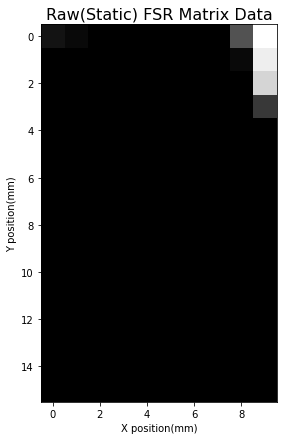

In [14]:
'''
draw data
'''
idx = 1
print(fsr_standard_segment_2d[idx].shape)
plt.figure(figsize=(11,6), constrained_layout=True)
plt.imshow(fsr_standard_segment_2d[idx], interpolation='None', cmap='Greys_r')
plt.title("Raw(Static) FSR Matrix Data", fontsize=16)
plt.xlabel('X position(mm)')
plt.ylabel('Y position(mm)')
plt.show()